In [1]:
# giving a name to a function (Trasnform a string in a function)

myfunction = 'sum'
eval(myfunction)

<function sum(iterable, /, start=0)>

In [2]:
myfunc = eval(myfunction)

In [3]:
myfunc([1,2,3])

6

TEMPLATE MATCHING


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [5]:
#grabbing the image

full = cv2.imread('C:/Users/preda/Downloads/Computer-Vision-with-Python/DATA/sammy.jpg') #import the source image
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB) 

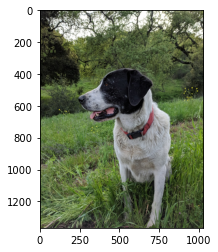

In [6]:
plt.imshow(full)

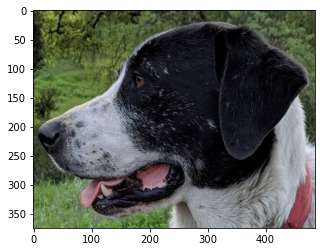

In [7]:
#grabbing the face image

face = cv2.imread('C:/Users/preda/Downloads/Computer-Vision-with-Python/DATA/sammy_face.jpg') #import the template image
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

plt.imshow(face)

In [8]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 
           'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 
           'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

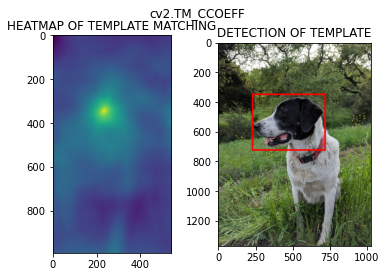

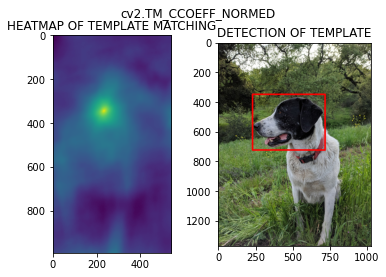

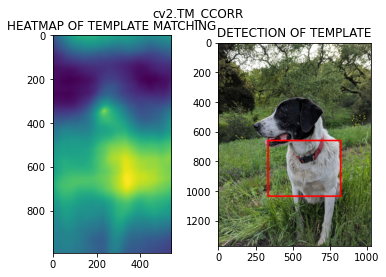

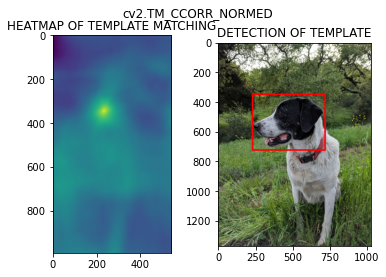

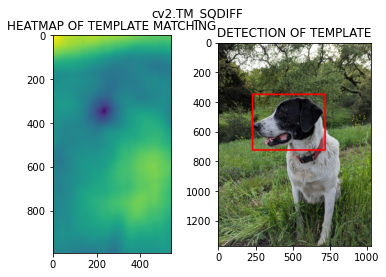

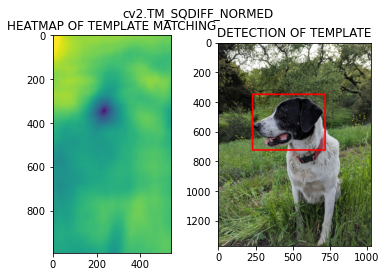

In [17]:
for m in methods:
    
    #CREATE A COPY OF THE IMAGE
    
    full_copy = full.copy()
    
    method = eval(m)
    
    
    #TEMPLATE MATCHING
    res = cv2.matchTemplate(full_copy, face, method) #full_copy: the image that will be scanned, face: the image that we're searching, method: 'how to search'.
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc 
    else:
        top_left = max_loc 
    
    height, width, channels =  face.shape  #point bottom-right of the rectangle
    
    bottom_right = (top_left[0]+width, top_left[1]+height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, (255,0,0), 10)
    
    
    #PLOT THE IMAGES
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    
    # TITLE WITH THE METHOD USED
    plt.suptitle(m)
    
    plt.show()
    
    print("\n")
    print("\n")

In [12]:
my_method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full, face, my_method)

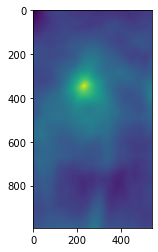

In [13]:
plt.imshow(res)